<a href="https://colab.research.google.com/github/mohithaareti/task-4/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data (1).csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

In [3]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [12]:
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [16]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [19]:
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Precision: 0.98
Recall: 0.95
ROC-AUC: 1.00


In [21]:
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)
y_pred_custom_labels = np.where(y_pred_custom == 1, 'M', 'B')
cm_custom = confusion_matrix(y_test, y_pred_custom_labels)
print(f"\nConfusion Matrix with threshold={threshold}:")
print(cm_custom)


Confusion Matrix with threshold=0.4:
[[70  1]
 [ 1 42]]


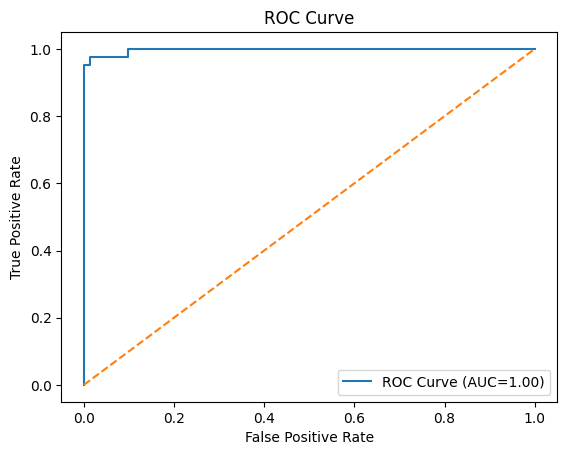

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='M')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_example = 0.5
print(f"\nSigmoid({z_example}) = {sigmoid(z_example):.4f}")


Sigmoid(0.5) = 0.6225
